In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
# warnings.filterwarnings("ignore")

%matplotlib inline

In [2]:
!ls dataSets/training

links (table 3).csv                volume(table 6)_training.csv
routes (table 4).csv               weather (table 7)_training.csv
trajectories(table 5)_training.csv


In [169]:
training_path1 = "dataSets/training/"
links = pd.read_csv(training_path1+'links (table 3).csv')
volume = pd.read_csv(training_path1+'volume(table 6)_training.csv')
routes = pd.read_csv(training_path1+'routes (table 4).csv')
weather = pd.read_csv(training_path1+'weather (table 7)_training.csv')
trajectories = pd.read_csv(training_path1+'trajectories(table 5)_training.csv')

In [39]:
training_path1 = "dataSets/training/"
links = pd.read_csv(training_path1+'links (table 3).csv')
print(links.shape)
print(links.info())
links.head()

(24, 7)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 7 columns):
link_id       24 non-null int64
length        24 non-null int64
width         24 non-null int64
lanes         24 non-null int64
in_top        21 non-null object
out_top       21 non-null object
lane_width    24 non-null int64
dtypes: int64(5), object(2)
memory usage: 1.4+ KB
None


,link_id,length,width,lanes,in_top,out_top,lane_width
0,100,58,3,1,105,111,3
1,101,84,3,1,116,121,3
2,102,131,9,3,115,109,3
3,103,23,12,4,111,"122,116",3
4,104,293,9,3,109,112,3


In [40]:
my_dict = {i:(str(i)+'s', str(i)+'e') for i in links['link_id']}
my_dict.items()

dict_items([(100, ('100s', '100e')), (101, ('101s', '101e')), (102, ('102s', '102e')), (103, ('103s', '103e')), (104, ('104s', '104e')), (105, ('105s', '105e')), (106, ('106s', '106e')), (107, ('107s', '107e')), (108, ('108s', '108e')), (109, ('109s', '109e')), (110, ('110s', '110e')), (111, ('111s', '111e')), (112, ('112s', '112e')), (113, ('113s', '113e')), (114, ('114s', '114e')), (115, ('115s', '115e')), (116, ('116s', '116e')), (117, ('117s', '117e')), (118, ('118s', '118e')), (119, ('119s', '119e')), (120, ('120s', '120e')), (121, ('121s', '121e')), (122, ('122s', '122e')), (123, ('123s', '123e'))])

In [41]:
links['link_id'] = [my_dict.get(i) for i in links['link_id']] 

In [42]:
links.head()

,link_id,length,width,lanes,in_top,out_top,lane_width
0,"(100s, 100e)",58,3,1,105,111,3
1,"(101s, 101e)",84,3,1,116,121,3
2,"(102s, 102e)",131,9,3,115,109,3
3,"(103s, 103e)",23,12,4,111,"122,116",3
4,"(104s, 104e)",293,9,3,109,112,3


In [43]:
routes = pd.read_csv(training_path1+'routes (table 4).csv')
print(routes.shape)
print(routes.info())
routes

(6, 3)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 3 columns):
intersection_id    6 non-null object
tollgate_id        6 non-null int64
link_seq           6 non-null object
dtypes: int64(1), object(2)
memory usage: 224.0+ bytes
None


,intersection_id,tollgate_id,link_seq
0,A,2,"110,123,107,108,120,117"
1,A,3,"110,123,107,108,119,114,118,122"
2,B,1,"105,100,111,103,116,101,121,106,113"
3,B,3,"105,100,111,103,122"
4,C,1,"115,102,109,104,112,111,103,116,101,121,106,113"
5,C,3,"115,102,109,104,112,111,103,122"


In [44]:
# Make tollgate_id string to simplify processing later

routes['tollgate_id'] = routes.tollgate_id.astype(str)

In [45]:
for i in range(len(routes['link_seq'])):
    routes['link_seq'][i] = routes['link_seq'][i].split(',')

In [46]:
routes

,intersection_id,tollgate_id,link_seq
0,A,2,"[110, 123, 107, 108, 120, 117]"
1,A,3,"[110, 123, 107, 108, 119, 114, 118, 122]"
2,B,1,"[105, 100, 111, 103, 116, 101, 121, 106, 113]"
3,B,3,"[105, 100, 111, 103, 122]"
4,C,1,"[115, 102, 109, 104, 112, 111, 103, 116, 101, ..."
5,C,3,"[115, 102, 109, 104, 112, 111, 103, 122]"


In [47]:
e_or_s = {0:'s', 1:'e'}
arr_list = []
for i in range(len(routes['link_seq'])):
    arr_list.append(['arr_' + str(i)])

for i,j in enumerate(routes['link_seq']):
    arr_list[i] = []
    for idx in range(len(j)):
        arr_list[i].append(j[idx]+ 's')
        arr_list[i].append(j[idx]+ 'e')
        
for i in range(len(routes['link_seq'])):
    routes['link_seq'][i] = arr_list[i]

routes

In [50]:
link_seq2 = []
for i, row in routes.iterrows():
    new_seq = [row[0]] + row[2] + [row[1]]
    link_seq2.append(new_seq)
    
routes['link_seq'] = link_seq2
routes

,intersection_id,tollgate_id,link_seq
0,A,2,"[A, 110s, 110e, 123s, 123e, 107s, 107e, 108s, ..."
1,A,3,"[A, 110s, 110e, 123s, 123e, 107s, 107e, 108s, ..."
2,B,1,"[B, 105s, 105e, 100s, 100e, 111s, 111e, 103s, ..."
3,B,3,"[B, 105s, 105e, 100s, 100e, 111s, 111e, 103s, ..."
4,C,1,"[C, 115s, 115e, 102s, 102e, 109s, 109e, 104s, ..."
5,C,3,"[C, 115s, 115e, 102s, 102e, 109s, 109e, 104s, ..."


In [59]:
def bubble(link_seq):
    new_seq = []
    for i in np.arange(0, len(link_seq), 2):
        new_str = '_'.join((link_seq[i],link_seq[i+1]))
        new_seq.append(new_str)
    return new_seq

routes['link_seq']= routes.link_seq.apply(lambda x: bubble(x))
routes     

,intersection_id,tollgate_id,link_seq
0,A,2,"[A_110s, 110e_123s, 123e_107s, 107e_108s, 108e..."
1,A,3,"[A_110s, 110e_123s, 123e_107s, 107e_108s, 108e..."
2,B,1,"[B_105s, 105e_100s, 100e_111s, 111e_103s, 103e..."
3,B,3,"[B_105s, 105e_100s, 100e_111s, 111e_103s, 103e..."
4,C,1,"[C_115s, 115e_102s, 102e_109s, 109e_104s, 104e..."
5,C,3,"[C_115s, 115e_102s, 102e_109s, 109e_104s, 104e..."


In [150]:

directions = routes.link_seq.apply(lambda x: [[x[i], x[i+1]] 
                                   for i in range(len(x)-1)])
directions = directions.sum()
link = pd.DataFrame(directions, columns = ['curr', 'next'])
print(link.shape)
link.head()

(48, 2)


,curr,next
0,A_110s,110e_123s
1,110e_123s,123e_107s
2,123e_107s,107e_108s
3,107e_108s,108e_120s
4,108e_120s,120e_117s


In [145]:
nodes = set(link.curr).union(set(link.next))

In [163]:
start_nodes = set(routes.link_seq.apply(lambda x: x[0]))
end_nodes = set(routes.link_seq.apply(lambda x: x[-1]))
other_nodes = nodes - (start_nodes.union(end_nodes))
print(start_nodes)
print(end_nodes)
print(len(other_nodes))

{'C_115s', 'B_105s', 'A_110s'}
{'122e_3', '113e_1', '117e_2'}
23


In [148]:
import networkx as nx 

Links = nx.DiGraph()
Links.add_nodes_from(nodes)
# G.add_edges_from(seq_dict)
for i in link.index:
    Links.add_edge(link.curr[i],link.next[i]) 

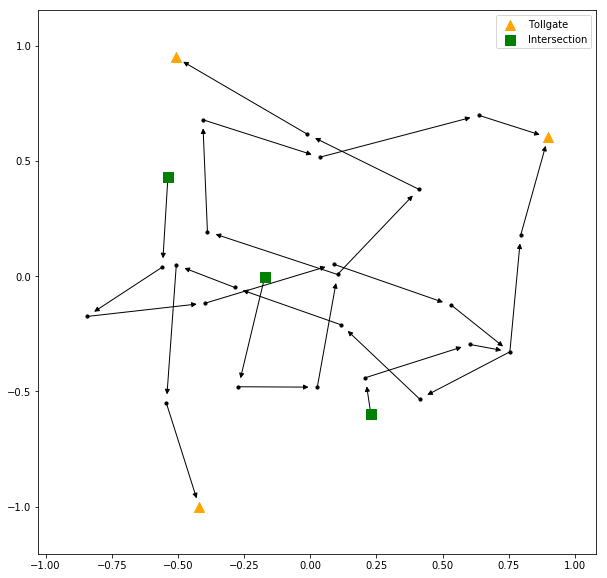

In [402]:
plt.figure(figsize=(10,10))

randomseed = 555
pos = nx.spring_layout(Links, k=0.5, seed = randomseed)
begin_end_nodes_size = 100
other_nodes_size = 10
nx.draw_networkx_nodes(Links, nodelist = end_nodes, node_shape = '^', node_color = 'orange', node_size = begin_end_nodes_size, pos=pos, with_labels = False, label = 'Tollgate')
nx.draw_networkx_nodes(Links, nodelist = start_nodes, node_shape = 's', node_color = 'green', node_size = begin_end_nodes_size, pos=pos, with_labels = False, label = 'Intersection')
nx.draw_networkx_nodes(Links, nodelist = other_nodes, node_shape = 'o', node_color = 'black', node_size = other_nodes_size, pos=pos, with_labels = False)

nx.draw_networkx_edges(Links, pos=pos, with_labels = False)


plt.legend()
# nx.draw_networkx(Links, nodelist = nodes_to_show, node_size = 10, pos=nx.spring_layout(Links, k=0.15), with_labels = False)

In [403]:
def normalize_vector(vector):
    '''
    Normalize an input vector and
    return the corresponding unit vector
    '''
    norm = np.linalg.norm(vector)
    unit_vector = np.array(vector/norm)
    length = np.sqrt((unit_vector**2).sum()) #saved for testing
   
    return unit_vector

def get_vector(edge, pos):
    '''
    Find the vector representation of the edge
    pos: a dict storing the cooridinates keyed by nodes
    '''
    start_coord = pos[edge[0]]
    end_coord = pos[edge[1]]
    return start_coord - end_coord

def search_link(edge):
    '''
    Given an edge from the traffic graph,
    return the corresponding link_id
    '''
    start_node_id = edge[0].split('_')[1][:3]
    end_node_id = edge[1].split('_')[0][:3]
    if start_node_id == end_node_id:
        return int(start_node_id)
    else:
        print("Something wrong!!")

In [404]:
# store unit vector of links, keyed by link_id
uv_dict = dict()
for edge in Links.edges:
    link_id = search_link(edge)
    uv_dict[link_id] = normalize_vector(get_vector(edge, pos))

# add the unit vector column to links dataframe
links['unit_vector'] = links.link_id.apply(lambda x: uv_dict[x])
links['true_vector'] = links.length * links.unit_vector

tv_dict = dict(zip(links.link_id, links.true_vector))
tv_dict

{100: array([-54.47523088, -19.91103262]),
 101: array([ 77.89987817, -31.4262467 ]),
 102: array([104.71259005,  78.71641179]),
 103: array([ -1.86457958, -22.92429591]),
 104: array([-276.83039755,  -95.98922331]),
 105: array([ 10.16327829, -77.33503588]),
 106: array([ 0.9380729 , 14.97063857]),
 107: array([ -5.25056267, -33.59213586]),
 108: array([ 37.40454242, -14.17392699]),
 109: array([-133.88151355,  -17.34186638]),
 110: array([ 22.26438816, 106.70190729]),
 111: array([-89.2319346 ,  81.72308026]),
 112: array([-184.81640614,   73.78276237]),
 113: array([-38.36411023, 138.79551522]),
 114: array([-185.87486066,   68.22416123]),
 115: array([  5.65039   , 106.85070469]),
 116: array([ 121.89898012, -132.44107613]),
 117: array([112.96524506, -75.72881491]),
 118: array([-197.20331027,  -59.55547346]),
 119: array([ 0.32853036, -8.99400177]),
 120: array([ 5.21879101, -2.9604426 ]),
 121: array([107.88822356, -47.79258539]),
 122: array([ -46.58377622, -191.41303977]),
 12

In [405]:
def dfs_addcoords(graph, tv_vectors, cur_node, pre_node = None, coords = {}):
    if pre_node == None:
        coords[cur_node] = np.array([0,0])
    else:
        link_id = int(pre_node.split('_')[1][:3])
        try:
            coords[cur_node] = coords[pre_node] + tv_vectors[link_id]
        except KeyError:
            link_id = int(pre_node.split('_')[0][:3])
            coords[cur_node] = coords[pre_node] + tv_vectors[link_id]
    for neighbor in graph.neighbors(cur_node):
        if neighbor not in coords:
            coords = dfs_addcoords(graph, tv_vectors, neighbor, cur_node, coords)

    return coords

In [418]:
label_pos = {}
for node in start_nodes:
    label_pos[node] = pos[node]
    print(Links[node])
label_pos

{'115e_102s': {}}
{'105e_100s': {}}
{'110e_123s': {}}


{'C_115s': array([-1108.99365739,  -417.28773831]),
 'B_105s': array([-672.65316109, -476.36685542]),
 'A_110s': array([0, 0])}

In [416]:
Links

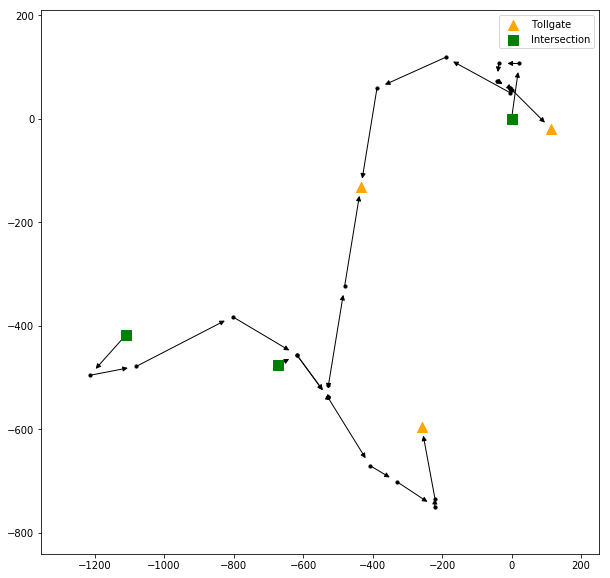

In [422]:
# New Graph with length of edges reflect the true relative length of links
from matplotlib.patches import ConnectionStyle

plt.figure(figsize=(10,10))
randomseed = 4
start_node = 'A_110s'

pos = dfs_addcoords(G, tv_dict, start_node)
other_nodes_size = 10
nx.draw_networkx_nodes(Links, nodelist = end_nodes, node_shape = '^', node_color = 'orange', node_size = begin_end_nodes_size, pos=pos, with_labels = False, label = 'Tollgate')
nx.draw_networkx_nodes(Links, nodelist = start_nodes, node_shape = 's', node_color = 'green', node_size = begin_end_nodes_size, pos=pos, with_labels = False, label = 'Intersection')
nx.draw_networkx_nodes(Links, nodelist = other_nodes, node_shape = 'o', node_color = 'black', node_size = other_nodes_size, pos=pos, with_labels = False)
# nx.draw_networkx_labels(nx.Graph(label_pos), pos=label_pos)
nx.draw_networkx_edges(Links, pos=pos, arrowsize=10, arrowstyle = '-|>', connectionstyle = ConnectionStyle("Arc3, rad=0.01"),with_labels = False)


plt.legend()